In [1]:
import re
import numpy as np
import pandas as pd
import jieba
import openpyxl
import nltk
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
import matplotlib.pyplot as plt
jieba.dt.cache_file = 'jieba.cache.lmspeech'

# Pro-imports legislators in Ma era

In [2]:
data = pd.read_excel("C:/Users/User/Documents/Operation Holy Grail/Phase 4//Data/Pork n beef import/MPSA/proimportsspeech_ma.xlsx")
data.fillna("",inplace=True)
lmspeech = list(data['text'])
data.head()

,name,sitting,date,text
0,孔文吉,立法院第7屆第4會期社會福利及衛生環境委員會第11次全體委員會議,2009-10-26,\n主席、各位列席官員、各位同仁。我要先跟各位委員說明一下，談到開放美國牛肉進口，行政院從來...
1,鄭麗文,立法院第7屆第4會期社會福利及衛生環境委員會第11次全體委員會議,2009-10-26,\n主席、各位列席官員、各位同仁。這次的事情之所以會全國譁然，當然是因為狂牛症與民眾的生命健...
2,江義雄,立法院第7屆第4會期社會福利及衛生環境委員會第11次全體委員會議,2009-10-29,\n主席、各位列席官員、各位同仁。國安會蘇起秘書長認為我們與美國簽訂的議定書效力比國內法律還...
3,呂學樟,立法院第7屆第4會期第16次會議,2010-01-05,\n（11時39分）主席、各位同仁。捍衛台灣人民的食品衛生健康，是我們國民黨立法院黨團責無旁...
4,林鴻池,立法院第7屆第6會期社會福利及衛生環境委員會第21次全體委員會議,2010-12-13,\n主席、各位列席官員、各位同仁。署長最近血壓有沒有飆高？\n\n看你臉色泛紅。\n\n署長...


In [3]:
jieba.set_dictionary('beefnpork.txt')
jieba.load_userdict('beefnpork.txt')
with open('stopwords.txt', encoding = 'UTF-8') as f:
    stop_words = f.readlines()
stop_words = [w.replace('\n', '') for w in stop_words]
stop_words = [w.replace(' ', '') for w in stop_words]
rule = re.compile(r"[^\u4e00-\u9fa5]")
lmspeech = [list(jieba.cut(rule.sub('', speech))) for speech in lmspeech]
for idx, speech in enumerate(lmspeech):
    lmspeech[idx] = ' '.join([word for word in speech if word.strip() not in stop_words])

Building prefix dict from c:\venv\workspace\source\Text mining\beefnpork.txt ...
Dumping model to file cache C:\Users\User\AppData\Local\Temp\jieba.cache.lmspeech
Loading model cost 0.006 seconds.
Prefix dict has been built successfully.


In [4]:
swo=pd.DataFrame(columns=['發言內容'], data = lmspeech)
swo.to_excel("test_bnfma.xlsx",encoding='UTF-8')

In [5]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(lmspeech)
    bag_of_words = vec.transform(lmspeech)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(lmspeech, 10)
for word, freq in common_words:
    print(word, freq)

美國 252
進口 185
牛肉 165
瘦肉精 109
臺灣 107
美牛 87
國人 69
報告 67
政府 64
國家 61


In [6]:
#Plotting the bar graph using plotly package
import plotly.express as px
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

ma_plotly = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])
ma_plotly.groupby('ReviewText').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', xTitle='Terms', yTitle='Count', linecolor='black', title='The 10 most frequent terms of pro-imports legislators in Ma era')

In [7]:
common_words

[('美國', 252),
 ('進口', 185),
 ('牛肉', 165),
 ('瘦肉精', 109),
 ('臺灣', 107),
 ('美牛', 87),
 ('國人', 69),
 ('報告', 67),
 ('政府', 64),
 ('國家', 61)]

In [8]:
#Coverting list (common_words) to data frame
common_words
cwdf = pd.DataFrame(common_words, columns=['Terms', 'Freq.'])  
print(cwdf)

  Terms  Freq.
0    美國    252
1    進口    185
2    牛肉    165
3   瘦肉精    109
4    臺灣    107
5    美牛     87
6    國人     69
7    報告     67
8    政府     64
9    國家     61


[Text(0, 0.5, 'Terms'),
 Text(0.5, 0, 'Frequency'),
 Text(0.5, 1.0, 'The 10 most frequent terms of pro-imports legislators in Ma era')]

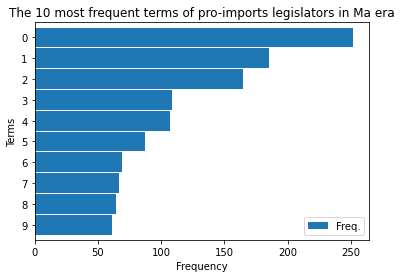

In [9]:
ax = cwdf.plot(kind='barh', width=0.95)
ax.invert_yaxis()
ax.set(xlabel='Frequency', ylabel='Terms', title='The 10 most frequent terms of pro-imports legislators in Ma era')

In [10]:
#from matplotlib import font_manager
#font_set = {f.name for f in font_manager.fontManager.ttflist}
#for f in font_set:
    #print(f)

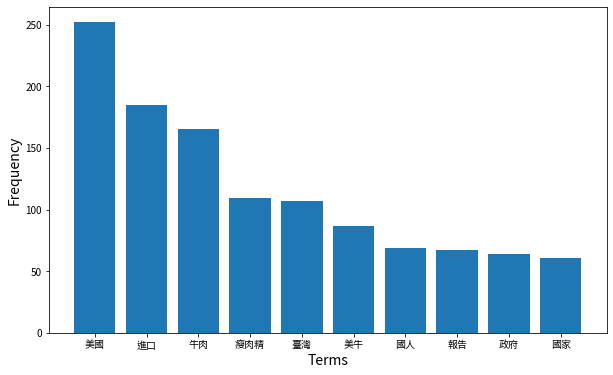

In [11]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
plt.rcParams['font.sans-serif'] = ['Noto Sans CJK TC']
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(10,6))
plt.bar(cwdf['Terms'],
       cwdf['Freq.'])

plt.xlabel('Terms', fontsize = 14)
plt.ylabel("Frequency", fontsize = 14)
#plt.title("The 10 most frequent terms of pro-imports legislators in Ma era", fontsize = 18)

plt.show()